# Logistic Regression

## Financial Sentiment Analysis

Le but de ce projet est de **prédire le sentiment (positif/neutre/négatif) de textes à caractère économique**.

Pour plus de précision sur les data, voir le lien suivant:<br>
https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

## Exercice


### Load Data
1. Loadez et examinez les data.<br>
   ```
   df = pd.read_csv("./data/FinancialSentiment.csv")
   ```


### Data Analysis
2. Faites l'histogramme de votre variable réponse, pour savoir si on a affaire à un problème équilibré (balanced) ou non.


### Model
3. "Splitez" vos data en un **train set** et un **test set**.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    

4. Utilisez la méthode appelée **TF-IDF** pour transformer vos data textuelles en vecteurs. Documentez-vous pour comprendre cette méthode.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer
    

5. Fittez une **régression logistique** sur vos data.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression<br>
    Calculer le **rapport de classification (classification report)** relatif à vos prédictions.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report


6. Fittez deux autres modèles sur vos data appelés **support vector machine classifier (SVC)** et **naive Bayes classifier (NB)**:<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html<br>
    Calculer le **rapport de classification (classification report)** relatif à vos prédictions.<br>


## Librairies

In [58]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

## Load Data

In [59]:
df = pd.read_csv("./data/FinancialSentiment.csv")

In [60]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [61]:
df.iloc[235]["Sentence"], df.iloc[235]["Sentiment"]

('The move was triggered by weak demand for forestry equipment and the uncertain market situation .',
 'negative')

In [62]:
df.shape

(5842, 2)

## Data Analysis

In [63]:
df.Sentiment.value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

<AxesSubplot:>

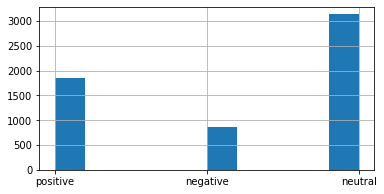

In [64]:
plt.figure(figsize=(6,3))

df.Sentiment.hist()

In [65]:
# remove/filter neural sentences

df = df[df.Sentiment!="neutral"]

In [66]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
...,...,...
5832,Operating profit fell to EUR 38.1 mn from EUR ...,negative
5835,HSBC Says Unit to Book $585 Million Charge on ...,negative
5836,Daily Mail parent company in talks with potent...,positive
5837,RISING costs have forced packaging producer Hu...,negative


<AxesSubplot:>

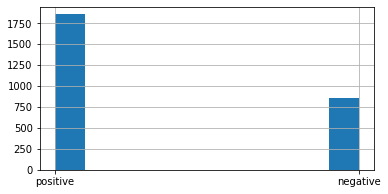

In [67]:
plt.figure(figsize=(6,3))

df.Sentiment.hist()

## Models

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df.Sentence, 
                                                    df.Sentiment, 
                                                    test_size=0.20,
                                                    random_state=42)

In [69]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((2169,), (543,), (2169,), (543,))

### LR

### Explications

### Tf-Idf + LR: no pipeline

In [70]:
# instancie un tf-idf
vec = TfidfVectorizer()

# entraîne et transforme le tf-idf sur le train set
X_train_tfidf = vec.fit_transform(X_train)

# ici, tf-idf est entraîné:
# vocabulaire construit, fréquences des mots dans le document sont calculées..
# transforme le test set
X_test_tfidf = vec.transform(X_test)

In [71]:
X_train_tfidf.shape, X_test_tfidf.shape

((2169, 6353), (543, 6353))

In [72]:
# instancie une régression logistique
lr = LogisticRegression()

# entraîne la régression logistique
lr.fit(X_train_tfidf, y_train)

# calcule les prédictions
y_train_preds = lr.predict(X_train_tfidf)
y_test_preds = lr.predict(X_test_tfidf)

In [46]:
print(classification_report(y_test, y_test_preds, digits=3))

              precision    recall  f1-score   support

    negative      0.902     0.284     0.432       162
    positive      0.764     0.987     0.861       381

    accuracy                          0.777       543
   macro avg      0.833     0.635     0.647       543
weighted avg      0.805     0.777     0.733       543



In [47]:
print(classification_report(y_train, y_train_preds, digits=3))

              precision    recall  f1-score   support

    negative      0.978     0.577     0.726       698
    positive      0.832     0.994     0.906      1471

    accuracy                          0.860      2169
   macro avg      0.905     0.786     0.816      2169
weighted avg      0.879     0.860     0.848      2169



### Tf-Idf + LR: pipeline

In [48]:
# On regroupe les 2 étapes dans un pipeline

pipe = Pipeline([
    ('TfIdf', TfidfVectorizer()),
    ('LogisticRegression', LogisticRegression())
])

In [50]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('TfIdf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression())])

In [51]:
y_test_preds = pipe.predict(X_test)

In [53]:
print(classification_report(y_test, y_test_preds, digits=3))

              precision    recall  f1-score   support

    negative      0.902     0.284     0.432       162
    positive      0.764     0.987     0.861       381

    accuracy                          0.777       543
   macro avg      0.833     0.635     0.647       543
weighted avg      0.805     0.777     0.733       543



### Other models: LR, KNN, SVC and NB

In [81]:
models_d = {"LR" : LogisticRegression(), 
            "KNN" :  KNeighborsClassifier(), 
            "SVC" : SVC(),
            "NB" : MultinomialNB()}

In [88]:
for name, model in models_d.items():
    
    pipe = Pipeline([
        ("TfIdf", TfidfVectorizer()),
        (name, model)
    ])
    
    pipe.fit(X_train, y_train)
    y_hat = pipe.predict(X_test)
    
    print(f"\nResults for model {name}")
    print("*********************")
    print(classification_report(y_test, y_hat, digits=3))


Results for model LR
*********************
              precision    recall  f1-score   support

    negative      0.902     0.284     0.432       162
    positive      0.764     0.987     0.861       381

    accuracy                          0.777       543
   macro avg      0.833     0.635     0.647       543
weighted avg      0.805     0.777     0.733       543


Results for model KNN
*********************
              precision    recall  f1-score   support

    negative      0.664     0.488     0.562       162
    positive      0.804     0.895     0.847       381

    accuracy                          0.773       543
   macro avg      0.734     0.691     0.705       543
weighted avg      0.762     0.773     0.762       543


Results for model SVC
*********************
              precision    recall  f1-score   support

    negative      0.907     0.302     0.454       162
    positive      0.769     0.987     0.864       381

    accuracy                          0.783     

## Hyperparameter Tuning

### No pipeline

In [89]:
# Apparté: entraînement d'un KNN
svc = SVC()
svc.fit(X_train_tfidf, y_train)
y_test_preds_svc = svc.predict(X_test_tfidf)

print(classification_report(y_test, y_test_preds_svc, digits=3))

              precision    recall  f1-score   support

    negative      0.907     0.302     0.454       162
    positive      0.769     0.987     0.864       381

    accuracy                          0.783       543
   macro avg      0.838     0.645     0.659       543
weighted avg      0.810     0.783     0.742       543



In [93]:
parameters = {"C" : [0.001, 0.1, 1, 10, 100], 
              "kernel" : ['linear', 'poly', 'rbf', 'sigmoid']}

svc = SVC()
gs = GridSearchCV(svc, parameters, verbose=2)
gs.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .............................C=0.001, kernel=linear; total time=   0.4s
[CV] END .............................C=0.001, kernel=linear; total time=   0.3s
[CV] END .............................C=0.001, kernel=linear; total time=   0.3s
[CV] END .............................C=0.001, kernel=linear; total time=   0.3s
[CV] END .............................C=0.001, kernel=linear; total time=   0.3s
[CV] END ...............................C=0.001, kernel=poly; total time=   0.4s
[CV] END ...............................C=0.001, kernel=poly; total time=   0.4s
[CV] END ...............................C=0.001, kernel=poly; total time=   0.4s
[CV] END ...............................C=0.001, kernel=poly; total time=   0.4s
[CV] END ...............................C=0.001, kernel=poly; total time=   0.4s
[CV] END ................................C=0.001, kernel=rbf; total time=   0.4s
[CV] END ................................C=0.00

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [95]:
gs.best_params_

{'C': 1, 'kernel': 'linear'}

In [96]:
y_hat = gs.predict(X_test_tfidf)

In [97]:
print(classification_report(y_test, y_hat, digits=3))

              precision    recall  f1-score   support

    negative      0.830     0.481     0.609       162
    positive      0.813     0.958     0.880       381

    accuracy                          0.816       543
   macro avg      0.821     0.720     0.744       543
weighted avg      0.818     0.816     0.799       543



### Pipeline

In [102]:
parameters = {
              "TfIdf__ngram_range" : [(1,1), (1,2)],
              "TfIdf__stop_words" : [None, "english"],
              "SVC__C" : [0.001, 0.1, 1, 10, 100], 
              "SVC__kernel" : ['linear', 'poly', 'rbf', 'sigmoid']
            }

In [103]:
pipe = Pipeline([
        ("TfIdf", TfidfVectorizer()),
        ("SVC", SVC())
    ])

In [104]:
gs = GridSearchCV(pipe, parameters, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=Pipeline(steps=[('TfIdf', TfidfVectorizer()),
                                       ('SVC', SVC())]),
             param_grid={'SVC__C': [0.001, 0.1, 1, 10, 100],
                         'SVC__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'TfIdf__ngram_range': [(1, 1), (1, 2)],
                         'TfIdf__stop_words': [None, 'english']},
             verbose=1)

In [106]:
gs.best_params_

{'SVC__C': 1,
 'SVC__kernel': 'linear',
 'TfIdf__ngram_range': (1, 1),
 'TfIdf__stop_words': None}

In [107]:
y_hat = gs.predict(X_test)

In [110]:
print(classification_report(y_test, y_hat, digits=3))

              precision    recall  f1-score   support

    negative      0.830     0.481     0.609       162
    positive      0.813     0.958     0.880       381

    accuracy                          0.816       543
   macro avg      0.821     0.720     0.744       543
weighted avg      0.818     0.816     0.799       543



## Save and load model

In [111]:
import pickle

In [112]:
with open("model.pkl", "wb") as f:
    pickle.dump(gs, f)

In [113]:
with open("model.pkl", "rb") as f:
    new_model = pickle.load(f)

In [114]:
y_hat = new_model.predict(X_test)
print(classification_report(y_test, y_hat, digits=3))

              precision    recall  f1-score   support

    negative      0.830     0.481     0.609       162
    positive      0.813     0.958     0.880       381

    accuracy                          0.816       543
   macro avg      0.821     0.720     0.744       543
weighted avg      0.818     0.816     0.799       543

